# Läs in kommundata

In [1]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Bromölla har id 1272 och har som senast totalt 12098 människor som bodde i kommunen. Snittåldern är 46 år


# Läs in bankomatdata

In [2]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 514301, som finns på addressen Centralgatan 7, i Ånge kommun. Det finns 109 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2014M01', 'antalTransaktioner': 4147, 'omsättning': 4255900}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

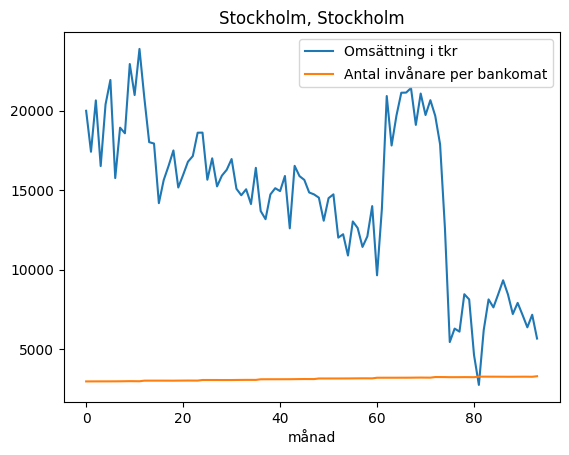

In [3]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

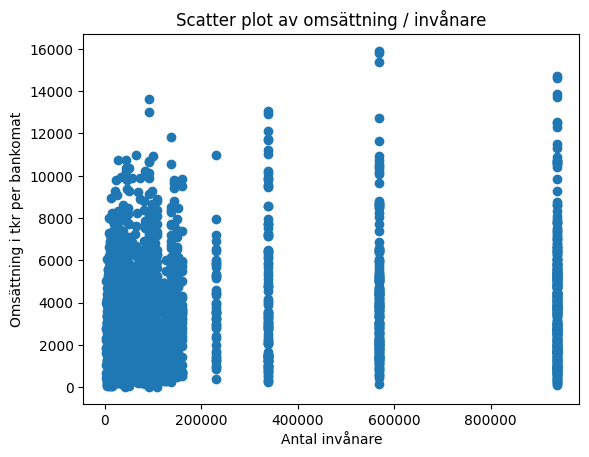

In [4]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

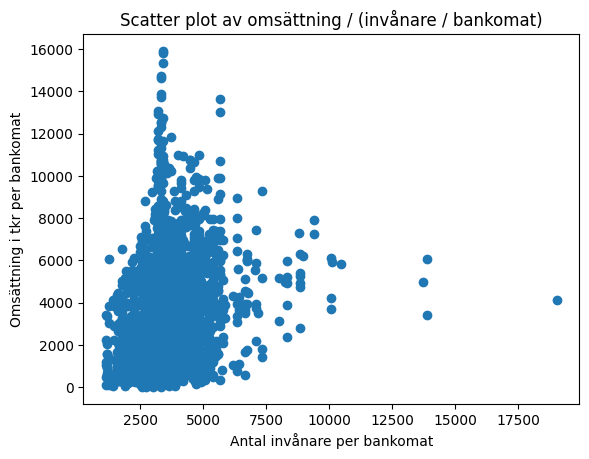

In [5]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)